## Geração de Dados

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

No conjunto de dados X colocamos os dados das colunas referentes às palavras. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

## Criação de Bolhas de Dados

In [10]:
from sklearn.datasets.samples_generator import make_moons

n_samples = 1000

_X, _y = make_moons(n_samples=n_samples, noise=0.2, random_state = 1)

O conjunto de dados $X$ possui dois atributos com valores gerados aleatoriamente

In [11]:
_X[:10]

array([[ 0.26291213,  0.2249473 ],
       [ 1.38248998, -0.71053075],
       [-0.75429824, -0.00371023],
       [-0.7073821 ,  0.94097268],
       [ 0.00271798,  1.29291749],
       [ 1.73044977,  0.14726145],
       [ 0.09204043,  0.96896263],
       [ 1.64901386, -0.31870656],
       [-0.74550634,  1.70016001],
       [ 1.08252092,  0.32509185]])

O vetor de dados $y$ possui o valor das classes (centers).

In [12]:
_y[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [13]:
groups = ['A','B','C']
y_g = [groups[i] for i in _y]

In [14]:
import pandas as pd
data = pd.DataFrame({
    'x1' : _X[:,0], 
    'x2' : _X[:,1], 
    'target' : y_g})

data["target"] = data["target"].astype('category')

In [15]:
data.head()

x1        x2 target
0  0.262912  0.224947      B
1  1.382490 -0.710531      B
2 -0.754298 -0.003710      A
3 -0.707382  0.940973      A
4  0.002718  1.292917      A

## Visualização dos Dados

(-1.819195636834714,
 2.6333925678005383,
 -1.2797651807018264,
 1.8528634338549832)

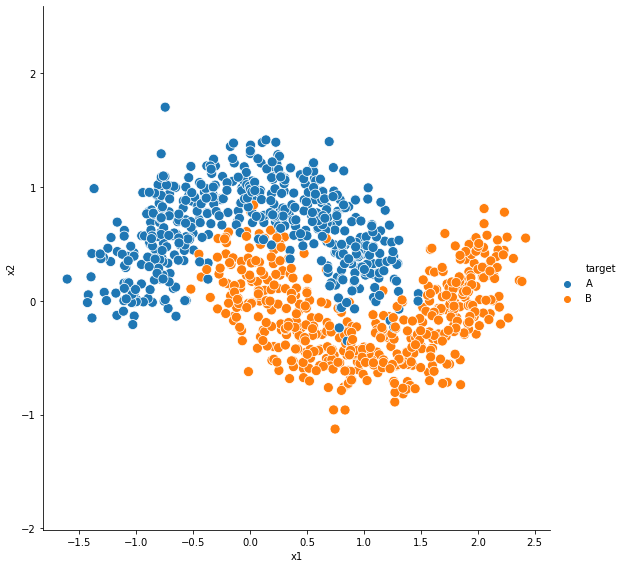

In [16]:
sns.relplot(x='x1', y='x2', hue='target', data = data, height=8, s=100)
plt.axis('equal')

## Escolha do Objetivo e Preparação dos Dados para Indução

Definindo qual é o nome da coluna que é nosso objetivo de predição (classificação)

In [17]:
target = "target"

No conjunto de dados X colocamos os dados das colunas referentes aos atributos. Basicamente X são todas as colunas menos a coluna target, definida na linha anterior. Já a variável y conserva apenas os dados do objetivo target.

In [18]:
X = data.drop([target], axis=1)
y = data[target].factorize()[0]

In [19]:
X.head()

x1        x2
0  0.262912  0.224947
1  1.382490 -0.710531
2 -0.754298 -0.003710
3 -0.707382  0.940973
4  0.002718  1.292917

In [20]:
y[:6]

array([0, 0, 1, 1, 1, 0], dtype=int64)

## Separação dos Dados em Treino e Teste

Deixamos 25% para teste, a separação será estratificada e a semente é 10.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=10)

## Definição do Classificador

In [55]:
# Definir o classificador
from sklearn import svm
model = svm.SVC(C=1.0, kernel = "linear", max_iter = 100)
model = svm.SVC(C=1.0, kernel = "poly", degree = 3, max_iter = 1000)

In [56]:
# Printar o classificador para ver os seus parâmetros
model.fit(X_train, y_train) 

C:\Users\andres\Anaconda3\envs\dm\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=1000, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Predição do Conjunto de Teste 

In [57]:
y_test_pred = model.predict(X_test)

In [58]:
y_test_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

## Avaliação da Predição

### Matriz de Confusão

In [59]:
from pandas import crosstab
crosstab(y_test, y_test_pred, rownames = ['y_test'], colnames = ['y_test_pred ->']  )

y_test_pred ->    0    1
y_test                  
0               114   11
1                19  106

Há uma outra forma direta de fazer a matriz de confusão, no entanto não é muito boa de visualizar, pois retorna apenas uma matriz.

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[114,  11],
       [ 19, 106]], dtype=int64)

### Métrica de Acurácia

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.88

### Métricas de Avaliação por Classe: precision, recall e f1-score

In [62]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       125
           1       0.91      0.85      0.88       125

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



## Visualização das Predições

In [63]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,

Text(0.5, 1.0, 'SVM')

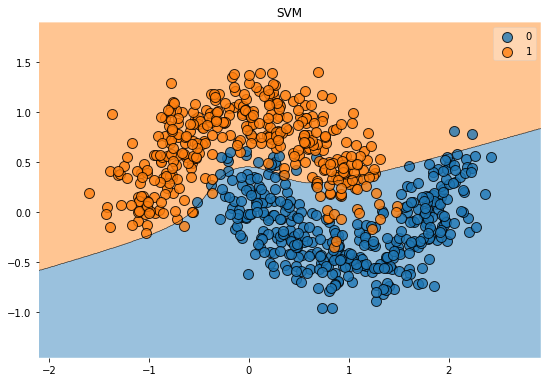

In [64]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_train.to_numpy(), y_train, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM')

Text(0.5, 1.0, 'SVM')

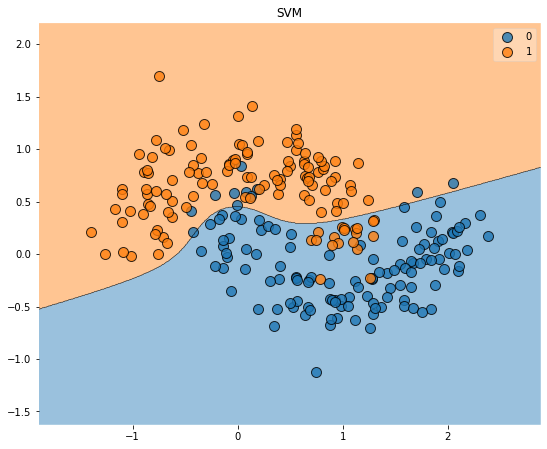

In [65]:
fig, ax = plt.subplots(figsize=(9, 9))
plot_decision_regions(X_test.to_numpy(), y_test, clf=model, legend=1, ax= ax, markers = 'o', zoom_factor = 2, scatter_kwargs = {'s': 100})
ax.set_aspect('equal')
ax.set_title('SVM') 